In [2]:
import numpy as np                   # import numpy package under shorthand "np"
import pandas as pd                  # import pandas package under shorthand "pd"
import seaborn as sns                # import seaborn package under shorthand "sns"
import matplotlib.pyplot as plt
from nose.tools import assert_equal
from numpy.testing import assert_array_equal

# Regression import 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
%config Completer.use_jedi = False  # enable code auto-completion

# import the csv file through pandas
df = pd.read_csv('netflix.csv')

# get rid of unnecessary columns
df.drop(columns = ['Adj Close'], inplace = True)

# turn Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# add a number fuction for dates
df['Date_No'] = range(1, len(df) + 1)

# add a change per day function
df['Change'] = df['Close'] - df['Open']


# setting feature and label matrixes
X = df[['Volume','Open', 'High', 'Low']]
y = df['Close']

In [3]:
df.head(5)

,Date,Open,High,Low,Close,Volume,Date_No,Change
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,1,-7.740005
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,2,18.020004
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,3,-2.019989
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,4,-16.979981
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,5,-4.380005


<function matplotlib.pyplot.show(close=None, block=None)>

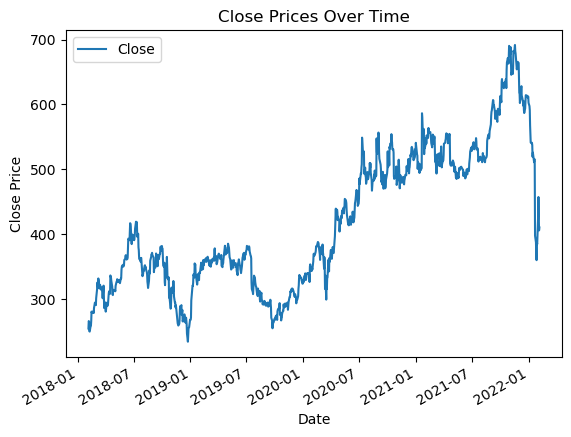

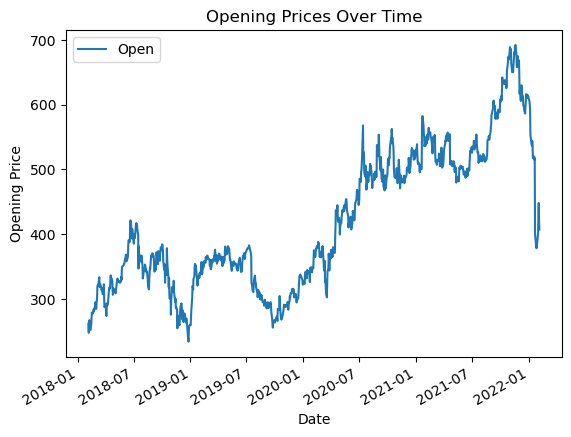

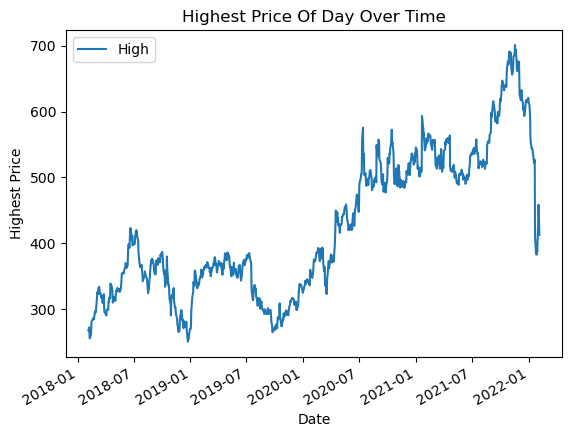

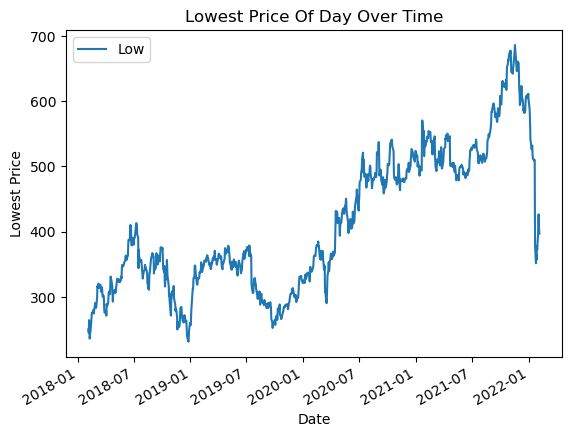

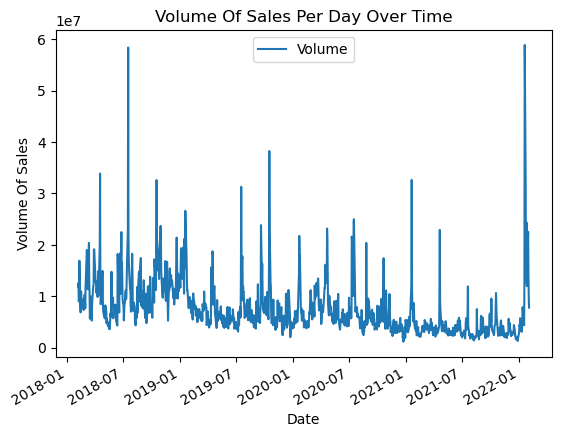

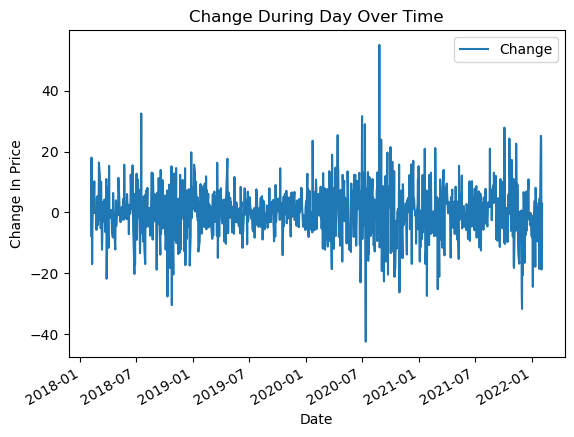

In [4]:
# line plots of prices, volume per day and change per day over time
df.plot(x = 'Date', y = 'Close', kind = 'line')
plt.title('Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')

df.plot(x = 'Date', y = 'Open', kind = 'line')
plt.title('Opening Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price')

df.plot(x = 'Date', y = 'High', kind = 'line')
plt.title('Highest Price Of Day Over Time')
plt.xlabel('Date')
plt.ylabel('Highest Price')

df.plot(x = 'Date', y = 'Low', kind = 'line')
plt.title('Lowest Price Of Day Over Time')
plt.xlabel('Date')
plt.ylabel('Lowest Price')

df.plot(x = 'Date', y = 'Volume', kind = 'line')
plt.title('Volume Of Sales Per Day Over Time')
plt.xlabel('Date')
plt.ylabel('Volume Of Sales')

df.plot(x = 'Date', y = 'Change', kind = 'line')
plt.title('Change During Day Over Time')
plt.xlabel('Date')
plt.ylabel('Change In Price')
plt.show

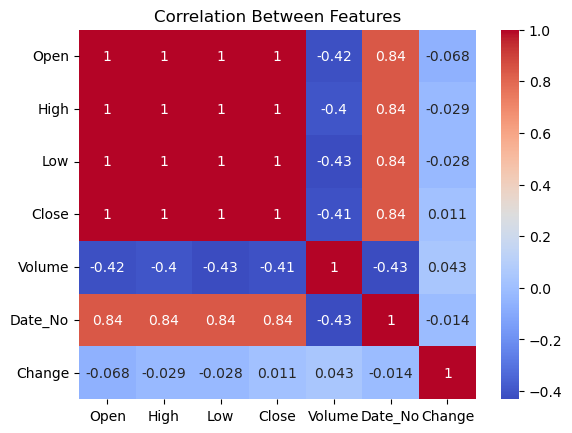

In [5]:
# heatmap of correlation between features
corr = df.drop(columns = ['Date']).corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Between Features')
plt.show()

In [42]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [43]:
# scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fit into support vector regression
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# epsilon-insensitive loss calculation with epsilon value 1
epsilon = 1
def epsilon_insensitive_loss(y, y_pred, epsilon):
    error = np.abs(y_test - y_pred)
    loss = np.maximum(0, error - epsilon)
    return loss
# this is the loss for each different data point in testing
loss = epsilon_insensitive_loss(y, y_pred, epsilon)
# average loss
e_insensitive_loss = np.mean(loss)


print('Support Vector Regression Model:')
print(f'Epsilon-insensitive loss: {e_insensitive_loss:.2f}')
print(f'R2 Score: {r2:.2f}\n')

Support Vector Regression Model:
Epsilon-insensitive loss: 9.60
R2 Score: 0.99

